In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from helper import TelecomHelper
import plots


In [4]:
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.6f}".format

In [5]:
CSV_PATH = "../data/cleaned_data.csv"

In [6]:
TelecomHelper = TelecomHelper()

In [7]:
df = TelecomHelper.read_csv(csv_path=CSV_PATH)

file read as csv


In [8]:
print(f"The percentage of data missing is: {TelecomHelper.percent_missing(df)}")

The percentage of data missing is: 0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   dur._(ms)                                 146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn/number                             146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

In [10]:
renamed_df = df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [11]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 146891 non-null  float64
 1   start                                     146891 non-null  object 
 2   start_ms                                  146891 non-null  float64
 3   end                                       146891 non-null  object 
 4   end_ms                                    146891 non-null  float64
 5   duration                                  146891 non-null  float64
 6   imsi                                      146891 non-null  float64
 7   msisdn                                    146891 non-null  float64
 8   imei                                      146891 non-null  float64
 9   last_location_name                        146891 non-null  object 
 10  avg_rtt_dl_(ms)     

In [12]:
agg_by_session_count = renamed_df.groupby('msisdn').agg({'bearer_id': 'count'})
session_freq_metrics = agg_by_session_count.sort_values(by=['bearer_id'], ascending = False)
session_freq_metrics.head(10)

bearer_id
msisdn                       
33626320676.000000         18
33614892860.000000         17
33625779332.000000         17
33659725664.000000         16
33675877202.000000         15
33760536639.000000         15
33667163239.000000         13
33603127838.000000         12
33760413819.000000         12
33627080969.000000         12

In [13]:
agg_by_duration = renamed_df.groupby('msisdn').agg({'duration': 'sum'})
duration_metrics = agg_by_duration.sort_values(by=['duration'], ascending = False)
duration_metrics.head(10)

duration
msisdn                            
33625779332.000000 18553754.000000
33614892860.000000  9966898.000000
33760536639.000000  9279434.000000
33626320676.000000  8791927.000000
33667163239.000000  8744914.000000
33664693736.000000  6288730.000000
33603127838.000000  6287761.000000
33667456716.000000  5649882.000000
33760413819.000000  5321667.000000
33604515716.000000  5207990.000000

In [14]:
agg_by_data = renamed_df.groupby('msisdn').agg({'total_data': 'sum'})
traffic_metric = agg_by_data.sort_values(by=['total_data'], ascending = False)
traffic_metric.head(10)

total_data
msisdn                              
33614892860.000000 8846226494.000000
33760536639.000000 8514773963.000000
33625779332.000000 8499620722.000000
33626320676.000000 7971167261.000000
33675877202.000000 7891110608.000000
33659725664.000000 7705862783.000000
33666464084.000000 7308500938.000000
33760413819.000000 7132370514.000000
33664712899.000000 6872018208.000000
33698792269.000000 6540899126.000000

In [15]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)
    

In [16]:

engagment_metrics = renamed_df.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagment_metrics = engagment_metrics.rename(columns={'bearer_id': 'sessions_frequency', 'total_data': 'total_traffic'})
engagment_metrics.sort_values(by=['sessions_frequency'], ascending=False).head(10)



sessions_frequency        duration     total_traffic
msisdn                                                                  
33626320676.000000                  18  8791927.000000 7971167261.000000
33614892860.000000                  17  9966898.000000 8846226494.000000
33625779332.000000                  17 18553754.000000 8499620722.000000
33659725664.000000                  16  4035428.000000 7705862783.000000
33675877202.000000                  15  4865947.000000 7891110608.000000
33760536639.000000                  15  9279434.000000 8514773963.000000
33667163239.000000                  13  8744914.000000 5618394054.000000
33603127838.000000                  12  6287761.000000 4976195043.000000
33760413819.000000                  12  5321667.000000 7132370514.000000
33627080969.000000                  12  4703516.000000 5754730859.000000

In [17]:
engagment_metrics.describe()


sessions_frequency        duration     total_traffic
count       105719.000000   105719.000000     105719.000000
mean             1.389447   146211.393988  688866059.424815
std              0.796173   184539.076531  486996435.345276
min              1.000000     7142.000000   33249009.000000
25%              1.000000    72729.000000  357950085.000000
50%              1.000000   103111.000000  616933544.000000
75%              2.000000   172799.000000  856473809.500000
max             18.000000 18553754.000000 8846226494.000000

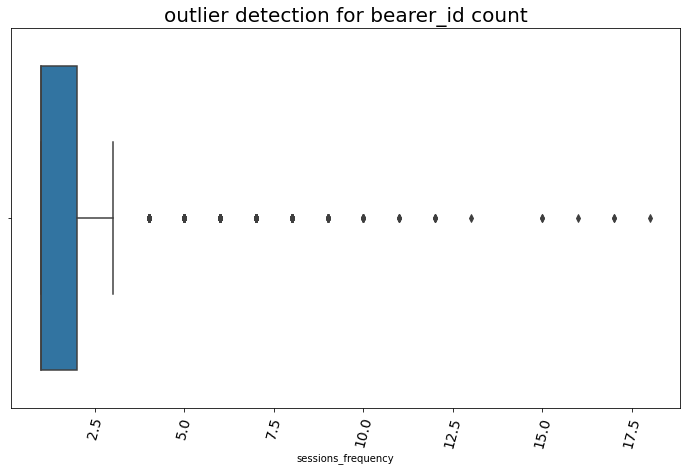

In [18]:
plots.plot_box(engagment_metrics, 'sessions_frequency', 'outlier detection for bearer_id count')

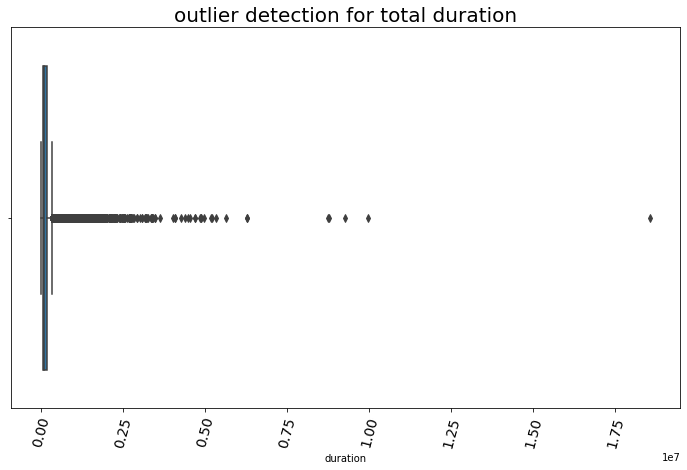

In [19]:
plots.plot_box(engagment_metrics, 'duration', 'outlier detection for total duration')

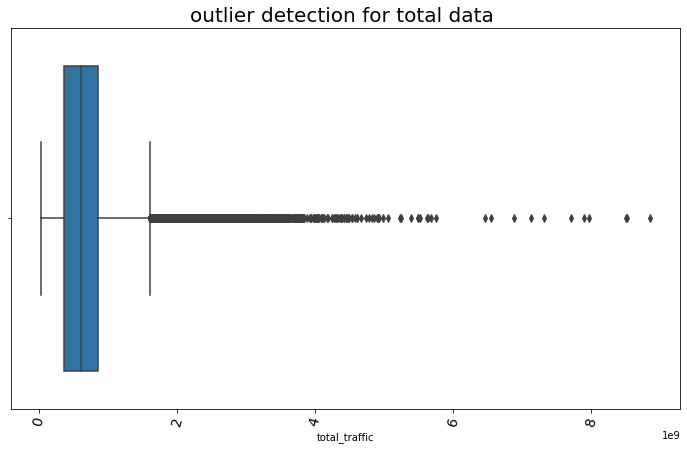

In [20]:
plots.plot_box(engagment_metrics, 'total_traffic', 'outlier detection for total data ')

In [21]:
def handle_outliers(df, col):
    df = df.copy()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    lower_bound = q1 - ((1.5) * (q3 - q1))
    upper_bound = q3 + ((1.5) * (q3 - q1))
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df



In [22]:

cleaned_engagment_metrics = handle_outliers(engagment_metrics, 'sessions_frequency')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'duration')
cleaned_engagment_metrics = handle_outliers(cleaned_engagment_metrics, 'total_traffic')
cleaned_engagment_metrics.describe()


sessions_frequency      duration     total_traffic
count       105719.000000 105719.000000     105719.000000
mean             1.356634 130349.580378  662283010.076524
std              0.650007  87018.309018  394711651.731353
min              1.000000   7142.000000   33249009.000000
25%              1.000000  72729.000000  357950085.000000
50%              1.000000 103111.000000  616933544.000000
75%              2.000000 172799.000000  856473809.500000
max              3.500000 322904.000000 1604259396.250000

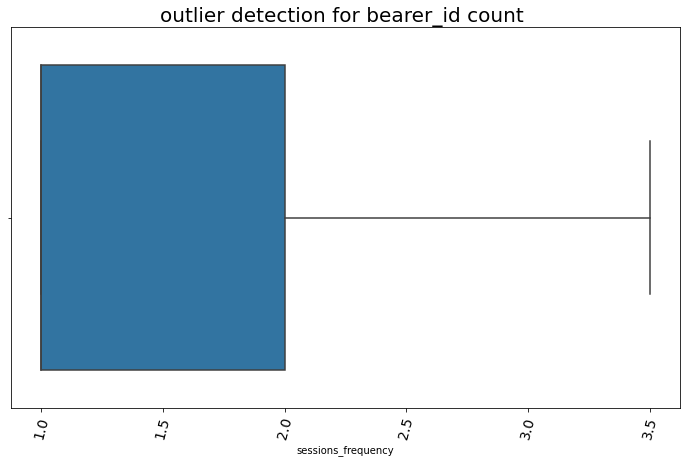

In [23]:
plots.plot_box(cleaned_engagment_metrics, 'sessions_frequency', 'outlier detection for bearer_id count ')


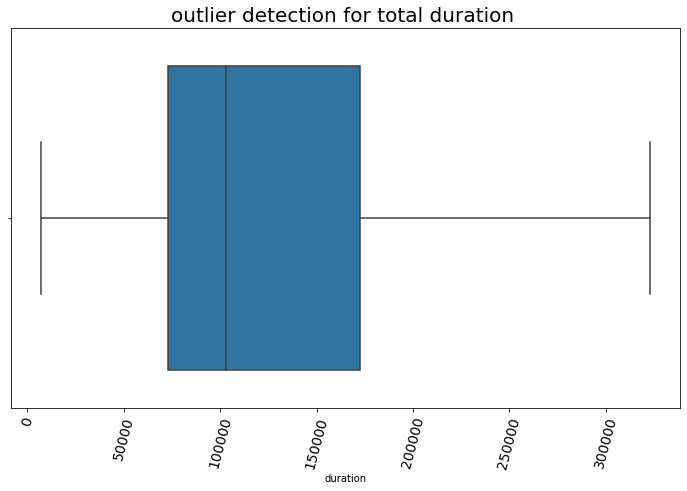

In [24]:
plots.plot_box(cleaned_engagment_metrics, 'duration', 'outlier detection for total duration ')


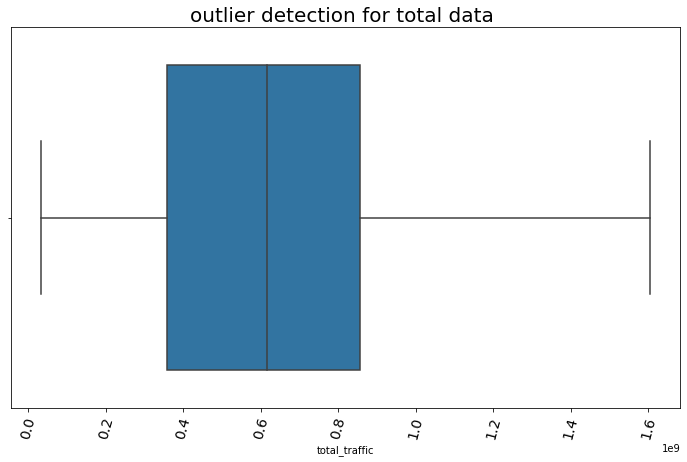

In [25]:
plots.plot_box(cleaned_engagment_metrics, 'total_traffic', 'outlier detection for total data ')


In [26]:

normalized_metrics = scale_and_normalize(cleaned_engagment_metrics, ['sessions_frequency', 'duration', 'total_traffic'])
normalized_metrics.describe()


sessions_frequency      duration  total_traffic
count       105719.000000 105719.000000  105719.000000
mean             0.130161      0.615899       0.654168
std              0.221570      0.260170       0.242921
min              0.000000      0.000000       0.000000
25%              0.000000      0.447434       0.496042
50%              0.000000      0.637558       0.680414
75%              0.327139      0.830555       0.855126
max              0.963529      1.000000       1.000000

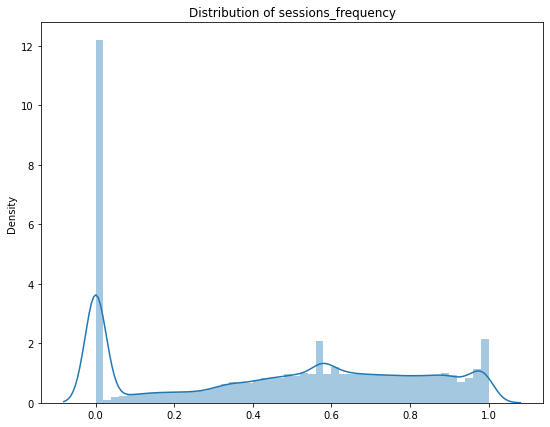

In [27]:
plots.plot_dist(normalized_metrics, 'sessions_frequency',)

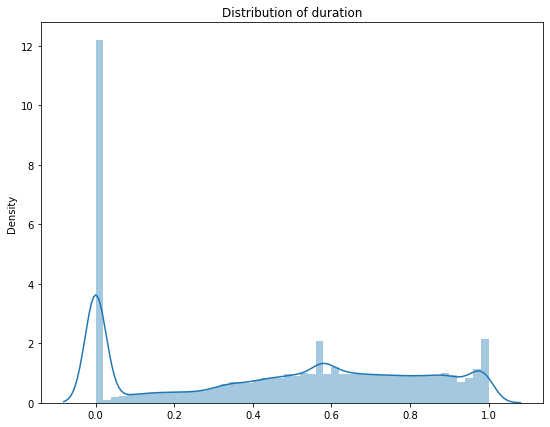

In [28]:
plots.plot_dist(normalized_metrics, 'duration',)

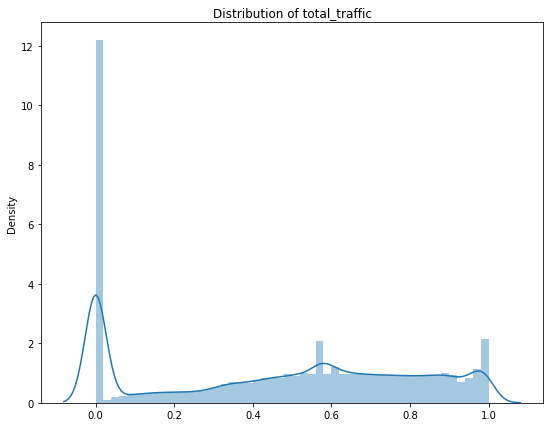

In [29]:
plots.plot_dist(normalized_metrics, 'total_traffic',)

In [47]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagment_metrics_with_cluster = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster['clusters'] = pred


In [48]:
def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)
    

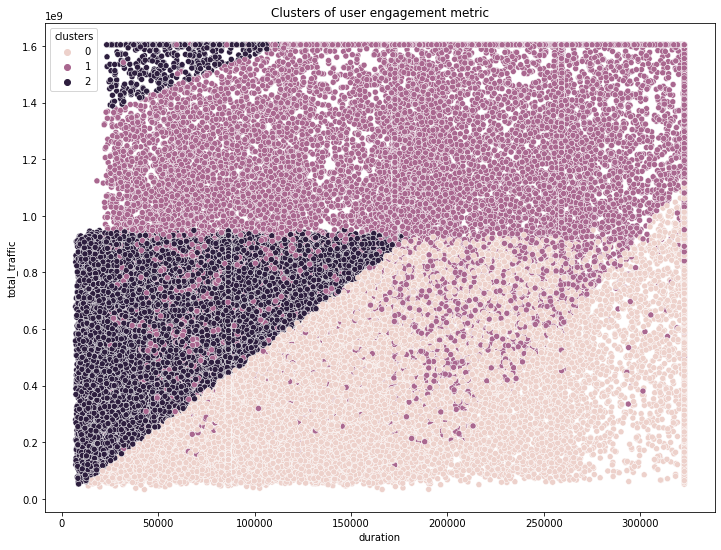

0    40229
2    39686
1    25804
Name: clusters, dtype: int64

In [49]:

# labels = ['cluser_1', 'cluser_2', 'cluser_3']

# engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
#                                                                                              cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()

plt.figure(figsize=(12,9))

sns.scatterplot(x = 'duration', y='total_traffic',
                hue='clusters', data=engagment_metrics_with_cluster).set_title('Clusters of user engagement metric')

plt.show()
# engagment_metrics_with_cluster.describe()
engagment_metrics_with_cluster['clusters'].value_counts()


In [33]:
# engagment_metrics_with_cluster.groupby('duration').agg()

In [34]:

print("Describing cluser 1 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 0]
cluser_1.describe()


Describing cluser 1 


sessions_frequency      duration     total_traffic     clusters
count        40150.000000  40150.000000      40150.000000 40150.000000
mean             1.058281 150470.103113  384806059.922067     0.000000
std              0.234278  73552.639562  227154550.857430     0.000000
min              1.000000  13755.000000   33249009.000000     0.000000
25%              1.000000  87585.500000  198975194.750000     0.000000
50%              1.000000 138176.000000  342257505.500000     0.000000
75%              1.000000 178778.500000  534120985.750000     0.000000
max              2.000000 322904.000000 1114005888.000000     0.000000

In [35]:
print("Describing cluser 2 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 1]
cluser_1.describe()

Describing cluser 2 


sessions_frequency      duration     total_traffic     clusters
count        39754.000000  39754.000000      39754.000000 39754.000000
mean             1.013131  65032.643986  636801290.616806     1.000000
std              0.113836  37766.584644  227932538.107965     0.000000
min              1.000000   7142.000000   52870808.000000     1.000000
25%              1.000000  29791.250000  492790624.500000     1.000000
50%              1.000000  65749.000000  656850559.000000     1.000000
75%              1.000000  86400.000000  798625601.000000     1.000000
max              2.000000 183342.000000 1604259396.250000     1.000000

In [36]:
print("Describing cluser 3 ")
print("======================")
cluser_1 =  engagment_metrics_with_cluster[engagment_metrics_with_cluster['clusters'] == 2]
cluser_1.describe()

Describing cluser 3 


sessions_frequency      duration     total_traffic     clusters
count        25815.000000  25815.000000      25815.000000 25815.000000
mean             2.349642 199641.484370 1133082925.788437     2.000000
std              0.564577  91644.903094  367933058.041386     0.000000
min              2.000000  18235.000000  119768539.000000     2.000000
25%              2.000000 124163.500000  863116276.500000     2.000000
50%              2.000000 188327.000000 1143724680.000000     2.000000
75%              3.000000 286190.500000 1477351824.000000     2.000000
max              3.500000 322904.000000 1604259396.250000     2.000000

Now let's save the engagement metrics

In [37]:
TelecomHelper.save_csv(engagment_metrics_with_cluster, "../data/user_engagement.csv")

File Successfully Saved.!!!


sessions_frequency      duration     total_traffic  \
msisdn                                                                       
33601001722.000000                1.000000 116720.000000  878690574.000000   
33601001754.000000                1.000000 181230.000000  156859643.000000   
33601002511.000000                1.000000 134969.000000  595966483.000000   
33601007832.000000                1.000000  49878.000000  422320698.000000   
33601008617.000000                2.000000  37104.000000 1457410944.000000   
...                                    ...           ...               ...   
33789967113.000000                1.000000 160461.000000  208123067.000000   
33789980299.000000                2.000000 210389.000000 1094693386.000000   
33789996170.000000                1.000000   8810.000000  714641641.000000   
33789997247.000000                1.000000 140988.000000  480307335.000000   
337000037000919.000000            1.000000 253030.000000  596287824.000000   

                        clusters  
msisdn                            
33601001722.000000             1  
33601001754.000000             0  
33601002511.000000             0  
33601007832.000000             1  
33601008617.000000             1  
...                          ...  
33789967113.000000             0  
33789980299.000000             2  
33789996170.000000             1  
33789997247.000000             0  
337000037000919.000000         0  

[105719 rows x 4 columns]

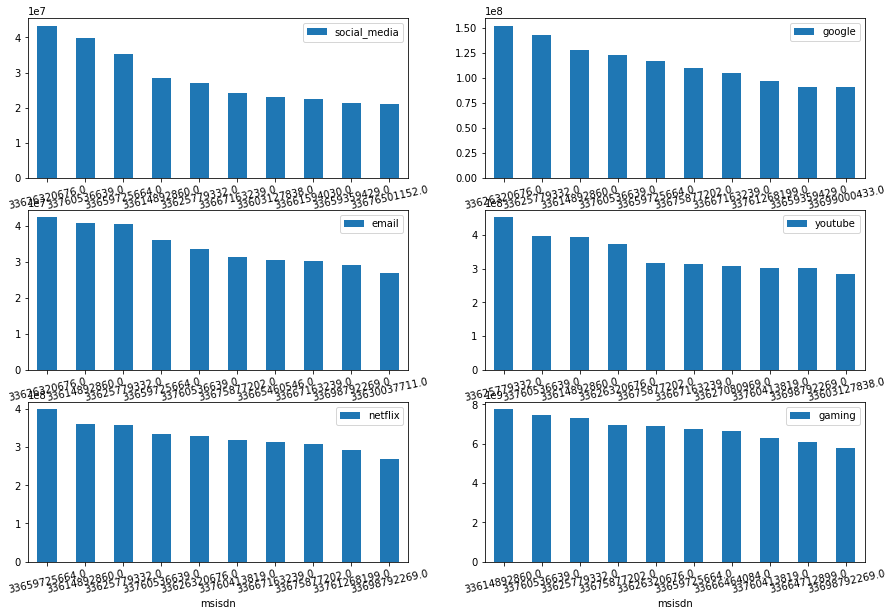

In [38]:

app_metrics = []

app_columns = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming']

app_metrics = renamed_df.groupby('msisdn').agg({'social_media': 'sum',
                                        'google': 'sum',
                                        'email': 'sum',
                                        'youtube': 'sum',
                                        'netflix': 'sum', 
                                        'gaming': 'sum'})



figure, axes = plt.subplots(3, 2, figsize=(15,10))

count = 0
for app_metric in app_metrics:
    
    x = app_metrics[[app_metric]].sort_values(by = [app_metric], ascending=False).head(10)
    x.plot.bar(y=app_metric, ax=axes[(count//2), count%2], rot=12)
    count += 1




In [39]:

app_total_df = pd.DataFrame(columns=['app', 'total'])
app_total_df['app'] = app_columns

app_metrics
app_totals = [ ]
for app in app_columns:
    app_totals.append(app_metrics.sum()[app])
app_total_df['total'] =app_totals
    
app_total_df


app                 total
0  social_media   268478589410.000000
1        google  1146921653914.000000
2         email   331838236748.000000
3       youtube  3325904550858.000000
4       netflix  3324049323727.000000
5        gaming 63215294882199.000000

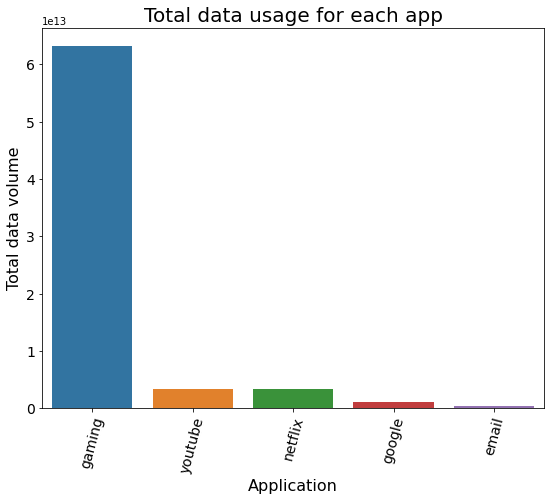

In [40]:

plots.plot_bar(app_total_df.sort_values(by=['total'],
                                  ascending = False).head(),
         x_col='app', y_col='total', title="Total data usage for each app",
         xlabel="Application", ylabel="Total data volume")


In [41]:
cleaned_engagment_metrics

sessions_frequency      duration     total_traffic
msisdn                                                                    
33601001722.000000                1.000000 116720.000000  878690574.000000
33601001754.000000                1.000000 181230.000000  156859643.000000
33601002511.000000                1.000000 134969.000000  595966483.000000
33601007832.000000                1.000000  49878.000000  422320698.000000
33601008617.000000                2.000000  37104.000000 1457410944.000000
...                                    ...           ...               ...
33789967113.000000                1.000000 160461.000000  208123067.000000
33789980299.000000                2.000000 210389.000000 1094693386.000000
33789996170.000000                1.000000   8810.000000  714641641.000000
33789997247.000000                1.000000 140988.000000  480307335.000000
337000037000919.000000            1.000000 253030.000000  596287824.000000

[105719 rows x 3 columns]

In [42]:

inertias = []
for k in range(1, 20):
    
    kmeans = KMeans(n_clusters=k).fit(normalized_metrics)
    inertias.append([k, kmeans.inertia_])

    



Text(0, 0.5, 'Inertia')

<Figure size 720x504 with 0 Axes>

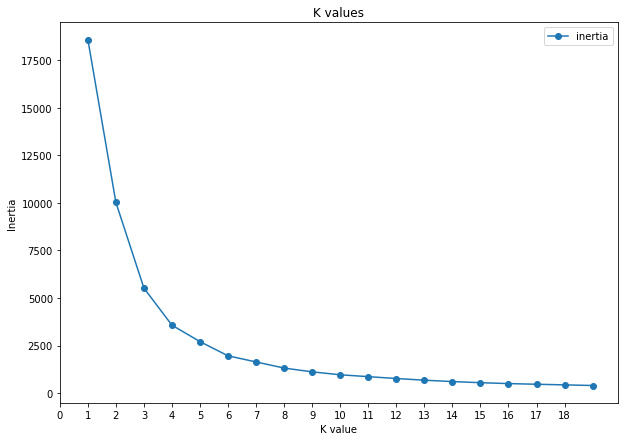

In [43]:

k_df = pd.DataFrame(columns=['k', 'inertia'])
k_df['k'] = [i[0] for i in inertias]
k_df['inertia'] = [i[1] for i in inertias]


plt.figure(figsize=(10,7))

k_df.plot( x='k', y='inertia', linestyle='-',
          marker='o', figsize=(10,7), title='K values').set_xlabel("K values")
plt.xticks(np.arange(len(k_df.index)))
plt.xlabel('K value')
plt.ylabel('Inertia')


# k_df.plot(inertias, linestyle='-', marker='o', )


#### As you can see the elblow is b/n 3 and 4
#### i choose 3 as for k value

In [44]:
kmeans_2 = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans_2.predict(normalized_metrics)

engagment_metrics_with_cluster2 = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster2['clusters'] = pred




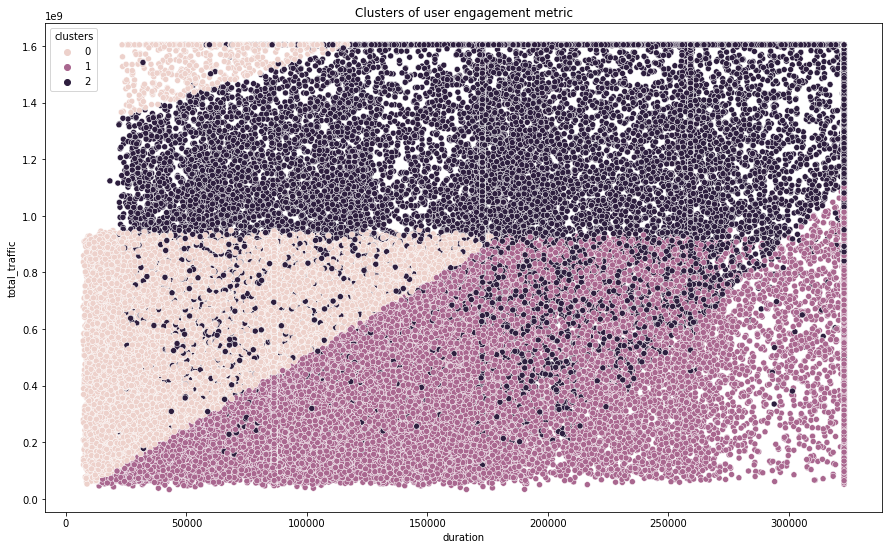

sessions_frequency      duration     total_traffic      clusters
count       105719.000000 105719.000000     105719.000000 105719.000000
mean             1.356634 130349.580378  662283010.076524      0.864405
std              0.650007  87018.309018  394711651.731353      0.778193
min              1.000000   7142.000000   33249009.000000      0.000000
25%              1.000000  72729.000000  357950085.000000      0.000000
50%              1.000000 103111.000000  616933544.000000      1.000000
75%              2.000000 172799.000000  856473809.500000      1.000000
max              3.500000 322904.000000 1604259396.250000      2.000000

In [45]:
# labels = ['cluser_1', 'cluser_2', 'cluser_3', 'cluser_4']

# engagment_metrics_with_cluster['clusters']  = engagment_metrics_with_cluster['clusters'].map(lambda x:
#                                                                                              cluser_label(x, labels))
engagment_metrics_with_cluster['clusters'].value_counts()
plt.figure(figsize=(15,9))

sns.scatterplot(x = 'duration', y='total_traffic',
                hue='clusters', data=engagment_metrics_with_cluster2).set_title('Clusters of user engagement metric')

plt.show()
engagment_metrics_with_cluster.describe()

## Task 4.1 A

engagement score to each user. 

In [71]:
engagment_metrics_with_cluster
kmeans_2

KMeans(n_clusters=3)

In [66]:
distance = kmeans.fit_transform(engagment_metrics_with_cluster)

distance_from_less_engagement = list(map(lambda x : x[0], distance))

engagment_metrics_with_cluster['score'] = distance_from_less_engagement


In [88]:
distance

array([[2.81791320e+08, 1.18750803e+09, 9.33969824e+08],
       [1.07547261e+09, 2.48329169e+08, 2.26981320e+09],
       [4.08575780e+08, 5.04019763e+08, 1.62064749e+09],
       ...,
       [1.18540763e+08, 7.89684257e+08, 1.33170718e+09],
       [6.91421181e+08, 2.36001223e+08, 1.90274125e+09],
       [4.07790145e+08, 5.04786820e+08, 1.61986428e+09]])

In [68]:
engagment_metrics_with_cluster['msisdn'] = engagment_metrics_with_cluster.index

In [69]:
TelecomHelper.save_csv(engagment_metrics_with_cluster, "../data/user_engagement.csv")

File Successfully Saved.!!!


sessions_frequency      duration     total_traffic  \
msisdn                                                                       
33601001722.000000                1.000000 116720.000000  878690574.000000   
33601001754.000000                1.000000 181230.000000  156859643.000000   
33601002511.000000                1.000000 134969.000000  595966483.000000   
33601007832.000000                1.000000  49878.000000  422320698.000000   
33601008617.000000                2.000000  37104.000000 1457410944.000000   
...                                    ...           ...               ...   
33789967113.000000                1.000000 160461.000000  208123067.000000   
33789980299.000000                2.000000 210389.000000 1094693386.000000   
33789996170.000000                1.000000   8810.000000  714641641.000000   
33789997247.000000                1.000000 140988.000000  480307335.000000   
337000037000919.000000            1.000000 253030.000000  596287824.000000   

                        clusters        enga_score             score  \
msisdn                                                                 
33601001722.000000             2  532090434.027460 1187508034.903370   
33601001754.000000             0 1253921354.366431  248329169.269407   
33601002511.000000             0  814814518.758926  504019763.292543   
33601007832.000000             2  988460314.457223  128363063.019269   
33601008617.000000             2   46630335.773752 2334064474.537566   
...                          ...               ...               ...   
33789967113.000000             0 1202657931.379292  192284797.946569   
33789980299.000000             1  316087610.974151 1709868528.205170   
33789996170.000000             2  696139389.835040  789684256.648069   
33789997247.000000             0  930473665.528846  236001223.065851   
337000037000919.000000         0  814493172.919777  504786819.719728   

                                       msisdn  
msisdn                                         
33601001722.000000         33601001722.000000  
33601001754.000000         33601001754.000000  
33601002511.000000         33601002511.000000  
33601007832.000000         33601007832.000000  
33601008617.000000         33601008617.000000  
...                                       ...  
33789967113.000000         33789967113.000000  
33789980299.000000         33789980299.000000  
33789996170.000000         33789996170.000000  
33789997247.000000         33789997247.000000  
337000037000919.000000 337000037000919.000000  

[105719 rows x 7 columns]